<a href="https://colab.research.google.com/github/MaidenTaief/Music_Final/blob/main/UserMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

print("Listing My Drive:")
drive_path = '/content/drive/My Drive'
print(os.listdir(drive_path))

try:
    shared_path = '/content/drive/Shared with me'
    print("\nListing Shared with me:")
    print(os.listdir(shared_path))
except Exception as e:
    print("\nError accessing 'Shared with me':", e)


In [ ]:
import pandas as pd

# Set the path to the dataset folder
dataset_path = '/content/drive/My Drive/DATASET'

# Reading the first CSV file and displaying the column names and first few rows
data_final_cleaned = pd.read_csv(f'{dataset_path}/data_final_cleaned.csv')
print("\nColumn Names of data_final_cleaned.csv:")
print(data_final_cleaned.columns)
print("\nHead of data_final_cleaned.csv:")
print(data_final_cleaned.head())

# Reading the second CSV file and displaying the column names and first few rows
spotify_dataset = pd.read_csv(f'{dataset_path}/spotify_dataset.csv', on_bad_lines='skip')
print("\nColumn Names of spotify_dataset.csv:")
print(spotify_dataset.columns)
print("\nHead of spotify_dataset.csv:")
print(spotify_dataset.head())



Column Names of data_final_cleaned.csv:
Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'cluster'],
      dtype='object')

Head of data_final_cleaned.csv:
   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_

# Importing necessary libraries
import pandas as pd

### Dataset Paths
- **Purpose**: Define the path where the dataset is stored. This ensures easy modifications and reusability.
- **Note**: Make sure the path corresponds to the location where your datasets are actually stored in Google Drive.

# Set the path to the dataset folder
dataset_path = '/content/drive/My Drive/DATASET'

### Data Loading and Cleaning
#### Load `data_final_cleaned.csv`
- **Objective**: Load specific columns to save memory and normalize the 'name' column for consistent formatting.
- **Columns Loaded**: 'name', 'id', 'artists', 'cluster'

# Reading the datasets with only necessary columns to save memory
data_final_cleaned = pd.read_csv(f'{dataset_path}/data_final_cleaned.csv', usecols=['name', 'id', 'artists', 'cluster'])
data_final_cleaned['name_normalized'] = data_final_cleaned['name'].str.lower().str.strip()

#### Load `spotify_dataset.csv`
- **Objective**: Handle any bad lines during the load and standardize the column names by stripping and replacing unnecessary characters.
- **Handling Bad Lines**: Skip lines that do not conform to expected format.

spotify_dataset = pd.read_csv(f'{dataset_path}/spotify_dataset.csv', on_bad_lines='skip')
spotify_dataset.columns = spotify_dataset.columns.str.strip().str.replace('"', '')
spotify_dataset['trackname_normalized'] = spotify_dataset['trackname'].str.lower().str.strip()

### Data Merging
- **Purpose**: Merge the two datasets on normalized song names to combine relevant information.
- **Method**: Inner join ensures only matching records are included in the final dataset.

# Merge datasets on normalized song names
merged_data = pd.merge(spotify_dataset, data_final_cleaned, left_on='trackname_normalized', right_on='name_normalized', how='inner')
merged_data.drop(columns=['trackname_normalized', 'name_normalized'], inplace=True)

### Save and Review Merged Data
- **Objective**: Save the merged dataset and provide an overview of its size and first few rows.

# Save the merged dataset
merged_data.to_csv(f'{dataset_path}/merged_data.csv', index=False)

# Show number of rows and columns in the merged dataset
print(f"Number of rows in merged dataset: {merged_data.shape[0]}")
print(f"Number of columns in merged dataset: {merged_data.shape[1]}")

# Display the first 10 rows of the merged dataset
print(merged_data.head(10))



In [ ]:
import pandas as pd

# Set the path to the dataset folder
dataset_path = '/content/drive/My Drive/DATASET'

# Reading the datasets with only necessary columns to save memory
data_final_cleaned = pd.read_csv(f'{dataset_path}/data_final_cleaned.csv', usecols=['name', 'id', 'artists', 'cluster'])
data_final_cleaned['name_normalized'] = data_final_cleaned['name'].str.lower().str.strip()

spotify_dataset = pd.read_csv(f'{dataset_path}/spotify_dataset.csv', on_bad_lines='skip')
spotify_dataset.columns = spotify_dataset.columns.str.strip().str.replace('"', '')
spotify_dataset['trackname_normalized'] = spotify_dataset['trackname'].str.lower().str.strip()

# Merge datasets on normalized song names
merged_data = pd.merge(spotify_dataset, data_final_cleaned, left_on='trackname_normalized', right_on='name_normalized', how='inner')
merged_data.drop(columns=['trackname_normalized', 'name_normalized'], inplace=True)

# Save the merged dataset
merged_data.to_csv(f'{dataset_path}/merged_data.csv', index=False)


# Show number of rows and columns in the merged dataset
print(f"Number of rows in merged dataset: {merged_data.shape[0]}")
print(f"Number of columns in merged dataset: {merged_data.shape[1]}")

print(merged_data.head(10))


Number of rows in merged dataset: 18210567
Number of columns in merged dataset: 8
                            user_id      artistname  \
0  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello   
2  ec6a9abc7a818b0c00788add9ec69c58  Elvis Costello   
3  ec6a9abc7a818b0c00788add9ec69c58  Elvis Costello   
4  7cae243a6e617bbac43848e587cf0177  Elvis Costello   
5  7cae243a6e617bbac43848e587cf0177  Elvis Costello   
6  6850dd8323fec9eecb29ce17bb967f2c  Elvis Costello   
7  6850dd8323fec9eecb29ce17bb967f2c  Elvis Costello   
8  0098b965803a4c10723f8e216f9e0904  Elvis Costello   
9  0098b965803a4c10723f8e216f9e0904  Elvis Costello   

                              trackname  \
0  (The Angels Wanna Wear My) Red Shoes   
1  (The Angels Wanna Wear My) Red Shoes   
2  (The Angels Wanna Wear My) Red Shoes   
3  (The Angels Wanna Wear My) Red Shoes   
4  (The Angels Wanna Wear My) Red Shoes   
5  (The Angels Wanna Wear My) Red Shoes   
6  (The Ang

# Importing necessary libraries
import pandas as pd

### Dataset Path
- **Purpose**: Establish the path where the dataset is stored, facilitating easy access and modifications.
- **Note**: Make sure the dataset path accurately points to where your datasets are stored on Google Drive.

# Set the path to the dataset folder
dataset_path = '/content/drive/My Drive/DATASET'

### Load the Merged Data
- **Objective**: Load the previously merged dataset for further processing.
- **File Loaded**: 'merged_data.csv'

# Load the merged data
merged_data = pd.read_csv(f'{dataset_path}/merged_data.csv')

### Data Cleaning
- **Purpose**: Remove exact duplicates to ensure the uniqueness of each record.
- **Method Used**: Pandas' `drop_duplicates` function, which inspects all columns for duplicates.

# Remove exact duplicates first
merged_data.drop_duplicates(inplace=True)

### Data Aggregation
- **Objective**: Aggregate the data to calculate the count of unique plays per song, per user, per playlist.
- **Details**: The aggregation is grouped by user ID, song name, playlist name, artist name, song ID, and cluster identifier.
- **Aggregation Result**: A new column 'play_count' indicates the number of times a song has been played within those groupings.

# Aggregate data to count unique plays per song per user per playlist
agg_data = merged_data.groupby(['user_id', 'name', 'playlistname', 'artistname', 'id', 'cluster']).size().reset_index(name='play_count')

### Save and Review Aggregated Data
- **Purpose**: Save the aggregated data for downstream analysis and provide an initial overview of its size and contents.
- **Output File**: 'aggregated_data.csv'

# Save the aggregated dataset
agg_data.to_csv(f'{dataset_path}/aggregated_data.csv', index=False)

# Show number of rows and columns in the aggregated dataset
print(f"Number of rows in aggregated dataset: {agg_data.shape[0]}")
print(f"Number of columns in aggregated dataset: {agg_data.shape[1]}")

# Display the first 20 rows of the aggregated dataset to inspect the results
print(agg_data.head(20))


In [9]:
import pandas as pd

# Set the dataset directory path
dataset_path = '/content/drive/My Drive/DATASET'

# Load the primary dataset with selected columns to optimize memory usage
data_final_with_descriptive_tags = pd.read_csv(f'{dataset_path}/data_final_with_genre_tags.csv', usecols=['name', 'artists', 'cluster', 'Cluster_Description','popularity','year'])
data_final_with_descriptive_tags['name_normalized'] = data_final_with_descriptive_tags['name'].str.lower().str.strip()

# Load Spotify data and standardize column names for consistency
spotify_dataset = pd.read_csv(f'{dataset_path}/spotify_dataset.csv', on_bad_lines='skip')
spotify_dataset.columns = spotify_dataset.columns.str.strip().str.replace('"', '')
spotify_dataset['trackname_normalized'] = spotify_dataset['trackname'].str.lower().str.strip()

# Merge datasets on normalized song names for precise data integration
merged_data = pd.merge(spotify_dataset, data_final_with_descriptive_tags, left_on='trackname_normalized', right_on='name_normalized', how='inner')
merged_data.drop(columns=['trackname_normalized', 'name_normalized'], inplace=True)

# Save the merged dataset for downstream processing
merged_data.to_csv(f'{dataset_path}/merged_data.csv', index=False)

# Log the merged data details for verification
print(f"Number of rows in merged dataset: {merged_data.shape[0]}")
print(f"Number of columns in merged dataset: {merged_data.shape[1]}")
print(merged_data.head(10))

Number of rows in merged dataset: 18210567
Number of columns in merged dataset: 10
                            user_id      artistname  \
0  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello   
2  ec6a9abc7a818b0c00788add9ec69c58  Elvis Costello   
3  ec6a9abc7a818b0c00788add9ec69c58  Elvis Costello   
4  7cae243a6e617bbac43848e587cf0177  Elvis Costello   
5  7cae243a6e617bbac43848e587cf0177  Elvis Costello   
6  6850dd8323fec9eecb29ce17bb967f2c  Elvis Costello   
7  6850dd8323fec9eecb29ce17bb967f2c  Elvis Costello   
8  0098b965803a4c10723f8e216f9e0904  Elvis Costello   
9  0098b965803a4c10723f8e216f9e0904  Elvis Costello   

                              trackname  \
0  (The Angels Wanna Wear My) Red Shoes   
1  (The Angels Wanna Wear My) Red Shoes   
2  (The Angels Wanna Wear My) Red Shoes   
3  (The Angels Wanna Wear My) Red Shoes   
4  (The Angels Wanna Wear My) Red Shoes   
5  (The Angels Wanna Wear My) Red Shoes   
6  (The An

In [10]:
# Load the merged dataset to continue processing
merged_data = pd.read_csv(f'{dataset_path}/merged_data.csv')

# Eliminate exact duplicates to clean the dataset
merged_data.drop_duplicates(inplace=True)

# Re-save the cleaned dataset to ensure data integrity
merged_data.to_csv(f'{dataset_path}/merged_cleaned_data.csv', index=False)

# Display the updated dataset size after cleaning
print(f"Number of rows after removing duplicates: {merged_data.shape[0]}")
print(f"Number of columns in dataset: {merged_data.shape[1]}")

# Ensure no essential data is missing before aggregation
print("\nInitial missing values check:")
print(merged_data.isnull().sum())

Number of rows after removing duplicates: 18177859
Number of columns in dataset: 10

Initial missing values check:
user_id                   0
artistname             3476
trackname                 0
playlistname            310
year                      0
artists                   0
name                      0
popularity                0
cluster                   0
Cluster_Description       0
dtype: int64


In [11]:
# Remove rows where 'artistname' or 'playlistname' are missing
merged_data.dropna(subset=['artistname', 'playlistname'], inplace=True)

# Check for missing values after removal to confirm
print("\nMissing values after removal of missing rows:")
print(merged_data.isnull().sum())

# Remove artists and name as they are redundant and to reduce size
merged_data.drop(columns=['artists', 'name'], inplace=True)

# Save the cleaned dataset
merged_data.to_csv(f'{dataset_path}/cleaned_merged_data.csv', index=False)

# Display updated dataset information and a sample of 50 records
print("\nUpdated Dataset Information:")
print(merged_data.info())

print("\nSample 50 records from the cleaned dataset:")
print(merged_data.sample(50))



Missing values after removal of missing rows:
user_id                0
artistname             0
trackname              0
playlistname           0
year                   0
artists                0
name                   0
popularity             0
cluster                0
Cluster_Description    0
dtype: int64

Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 18174073 entries, 0 to 18210566
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   user_id              object
 1   artistname           object
 2   trackname            object
 3   playlistname         object
 4   year                 int64 
 5   popularity           int64 
 6   cluster              int64 
 7   Cluster_Description  object
dtypes: int64(3), object(5)
memory usage: 1.2+ GB
None

Sample 50 records from the cleaned dataset:
                                   user_id                     artistname  \
13115251  29b179e124e84eedd9ffa4ff50ff48f0  

In [13]:
import pandas as pd

# Set the dataset directory path
dataset_path = '/content/drive/My Drive/DATASET'

# Load the cleaned dataset where missing values were handled and columns were optimized
cleaned_data = pd.read_csv(f'{dataset_path}/cleaned_merged_data.csv')

# Aggregate data to count unique plays per song per user, including more attributes
agg_data = cleaned_data.groupby(['user_id', 'trackname', 'artistname', 'playlistname', 'cluster', 'Cluster_Description', 'year', 'popularity']).size().reset_index(name='play_count')

# Save the aggregated data for detailed analysis and use in recommendation systems
agg_data.to_csv(f'{dataset_path}/aggregated_data_full.csv', index=False)

# Display the total information of the aggregated data to assess readiness for next steps
print("\nFully Aggregated Data Information:")
print(agg_data.info())

# Display 50 random samples from the aggregated data to ensure correctness and diversity
print("\nSample 50 records from the fully aggregated dataset:")
print(agg_data.sample(30))



Fully Aggregated Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18136453 entries, 0 to 18136452
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   user_id              object
 1   trackname            object
 2   artistname           object
 3   playlistname         object
 4   cluster              int64 
 5   Cluster_Description  object
 6   year                 int64 
 7   popularity           int64 
 8   play_count           int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ GB
None

Sample 50 records from the fully aggregated dataset:
                                   user_id  \
584787    08b050ca0527293790696ad6e80f48cc   
795914    0ba964f15ee83976e666a22f0962bb54   
11446201  9d7a401d0dd49a2b8b6ddeb958f520f8   
5043109   44e913174d11e8bb58d7f179573950fb   
6245108   5711c5c6e1e476930378248a69f4f4a3   
3679633   33f017b6a8430af2dc5e02b98a0fdbe7   
4410895   3eb1b39af64d552ba66bc954720e70f3   
10293071  

Shape of the sparse song interaction matrix: (15598, 101637)
Non-zero elements in song matrix: 4379989
Density of the matrix: 0.002762817932655533


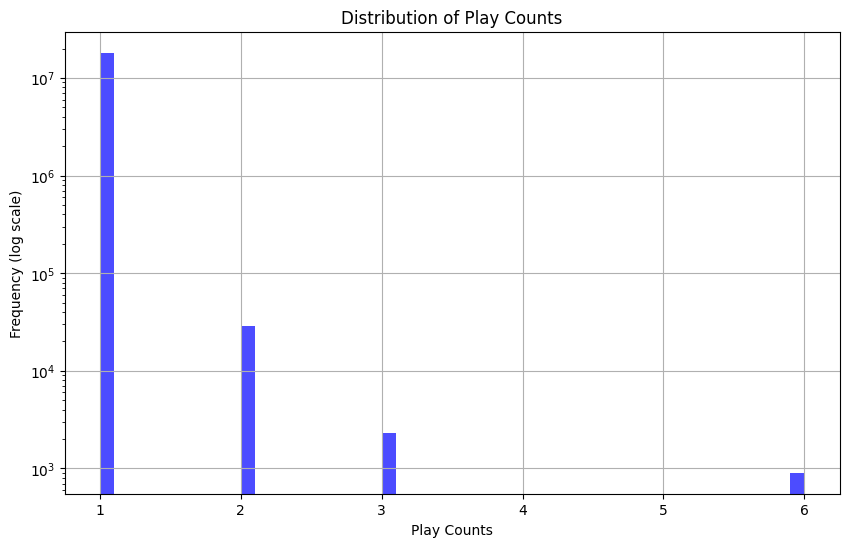

In [14]:
import pandas as pd
from scipy.sparse import csr_matrix, save_npz
import matplotlib.pyplot as plt

# Set the dataset directory path
dataset_path = '/content/drive/My Drive/DATASET'

# Load the aggregated data with the correct filename
agg_data = pd.read_csv(f'{dataset_path}/aggregated_data_full.csv')

# Convert user IDs and track names to categorical data types for efficient encoding
agg_data['user_id'] = pd.Categorical(agg_data['user_id'])
agg_data['trackname'] = pd.Categorical(agg_data['trackname'])

# Create row and column indices using the categorical codes
row_indices = agg_data['user_id'].cat.codes
col_indices = agg_data['trackname'].cat.codes

# Use play_count as the data for the sparse matrix
data = agg_data['play_count'].values

# Create a sparse matrix with rows as users and columns as tracks
# shape parameters are derived from the number of categories in each feature
interaction_matrix = csr_matrix((data, (row_indices, col_indices)),
                                shape=(agg_data['user_id'].cat.categories.size,
                                       agg_data['trackname'].cat.categories.size))

# Save the sparse matrix for future use
save_npz(f'{dataset_path}/sparse_song_matrix.npz', interaction_matrix)

# Display the shape of the interaction matrix and other details
print("Shape of the sparse song interaction matrix:", interaction_matrix.shape)
print("Non-zero elements in song matrix:", interaction_matrix.nnz)
print("Density of the matrix:", interaction_matrix.nnz / (interaction_matrix.shape[0] * interaction_matrix.shape[1]))

# Plotting the distribution of play counts
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, log=True, color='blue', alpha=0.7)
plt.title('Distribution of Play Counts')
plt.xlabel('Play Counts')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()

### Data Conversion for Matrix Operations
- **Purpose**: Convert user IDs and track names to categorical data types. This allows for efficient encoding and manipulation.
- **Method**: Use Pandas' Categorical type to transform and then access category codes.

# Convert user IDs and track names to categorical data types for efficient encoding
agg_data['user_id'] = pd.Categorical(agg_data['user_id'])
agg_data['name'] = pd.Categorical(agg_data['name'])

### Matrix Index Preparation
- **Objective**: Create row and column indices for the sparse matrix using the categorical codes from the transformed data.

# Create row and column indices using the categorical codes
row_indices = agg_data['user_id'].cat.codes
col_indices = agg_data['name'].cat.codes

### Sparse Matrix Creation
- **Purpose**: Create a sparse matrix where rows represent users and columns represent songs. The matrix values are the play counts.
- **Details**: Using the SciPy library to create a Compressed Sparse Row (CSR) matrix, which is efficient for row slicing and fast matrix-vector products.

# Use play_count as the data for the sparse matrix
data = agg_data['play_count'].values

# Create a sparse matrix with rows as users and columns as tracks
# shape parameters are derived from the number of categories in each feature
interaction_matrix = csr_matrix((data, (row_indices, col_indices)),
                                shape=(agg_data['user_id'].cat.categories.size,
                                       agg_data['name'].cat.categories.size))

### Save and Review the Sparse Matrix
- **Objective**: Save the generated sparse matrix to a file for future use and analyze its characteristics.
- **Output File**: 'sparse_song_matrix.npz'

# Save the sparse matrix for future use
save_npz(f'{dataset_path}/sparse_song_matrix.npz', interaction_matrix)

# Display the shape of the interaction matrix and other details
print("Shape of the sparse song interaction matrix:", interaction_matrix.shape)
print("Non-zero elements in song matrix:", interaction_matrix.nnz)


In [15]:
import pandas as pd
from scipy.sparse import csr_matrix, save_npz

# Load the data
dataset_path = '/content/drive/My Drive/DATASET'

# Load the aggregated data
agg_data = pd.read_csv(f'{dataset_path}/aggregated_data_full.csv')

# Convert user IDs and playlist names to categorical data types for efficient encoding
agg_data['user_id'] = pd.Categorical(agg_data['user_id'])
agg_data['playlistname'] = pd.Categorical(agg_data['playlistname'])

# Create row and column indices using the categorical codes
row_indices = agg_data['user_id'].cat.codes
col_indices = agg_data['playlistname'].cat.codes

# Use play_count as the data for the sparse matrix
data = agg_data['play_count'].values

# Create a sparse matrix with rows as users and columns as playlists
# The shape parameters are derived from the number of categories in each feature
playlist_interaction_matrix = csr_matrix((data, (row_indices, col_indices)),
                                shape=(agg_data['user_id'].cat.categories.size,
                                       agg_data['playlistname'].cat.categories.size))

# Save the sparse matrix for future use
save_npz(f'{dataset_path}/playlist_interaction_sparse_matrix.npz', playlist_interaction_matrix)

# Display the shape of the interaction matrix and other details
print("Shape of the playlist interaction matrix:", playlist_interaction_matrix.shape)
print("Non-zero elements in playlist matrix:", playlist_interaction_matrix.nnz)
print("Density of the playlist matrix:", playlist_interaction_matrix.nnz / (playlist_interaction_matrix.shape[0] * playlist_interaction_matrix.shape[1]))


Shape of the playlist interaction matrix: (15598, 136182)
Non-zero elements in playlist matrix: 204251
Density of the playlist matrix: 9.61558181487398e-05


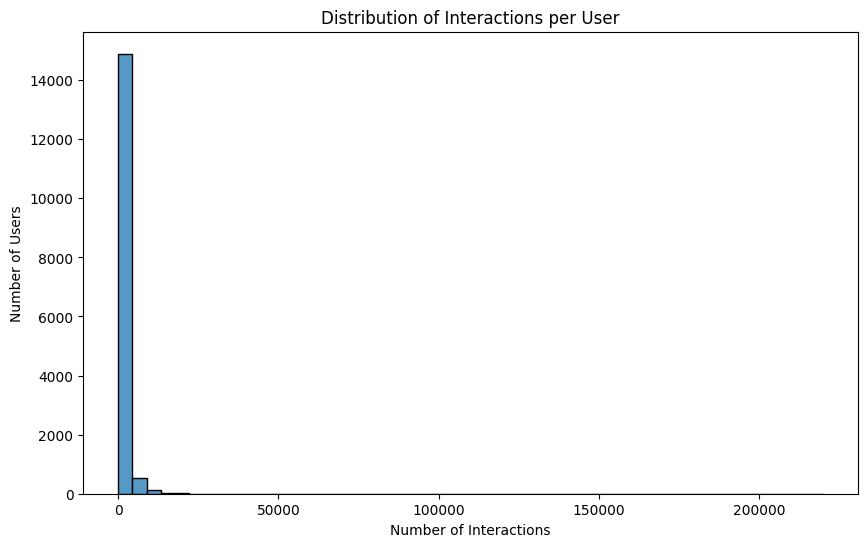

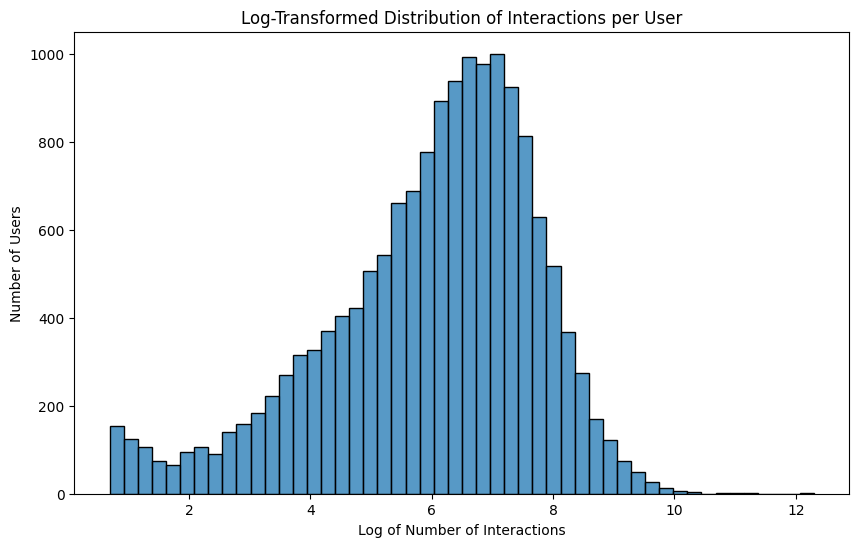

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sum interactions across songs for each user
user_interactions = interaction_matrix.sum(axis=1).A.ravel()  # .A converts to dense array, .ravel to flatten it

# Plot the distribution of interactions
plt.figure(figsize=(10, 6))
sns.histplot(user_interactions, bins=50, kde=False)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(user_interactions), bins=50, kde=False)  # Use log1p for log(1+x) transformation
plt.title('Log-Transformed Distribution of Interactions per User')
plt.xlabel('Log of Number of Interactions')
plt.ylabel('Number of Users')
plt.show()


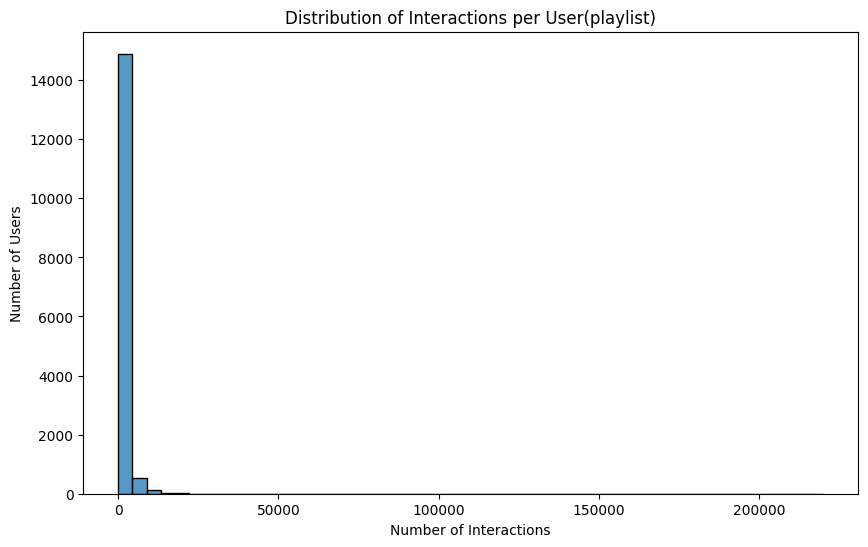

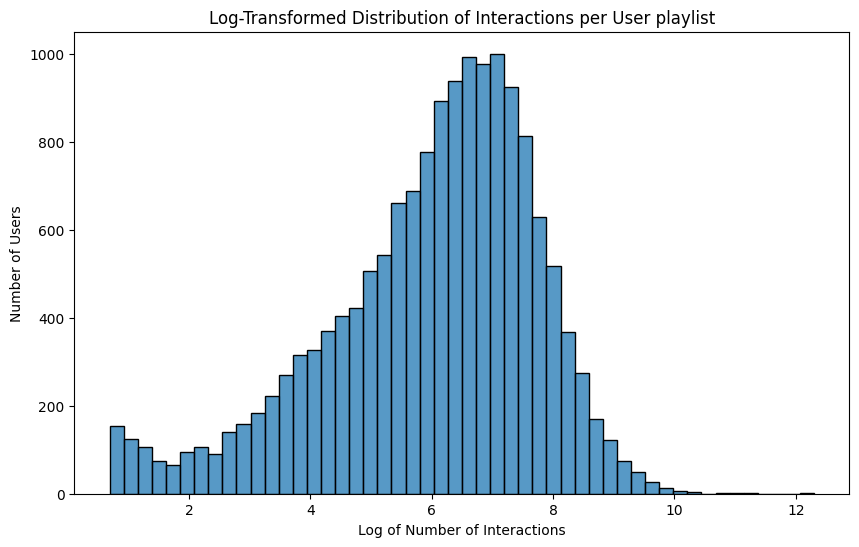

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sum interactions across songs for each user
user_playlist_interactions = playlist_interaction_matrix.sum(axis=1).A.ravel()  # .A converts to dense array, .ravel to flatten it

# Plot the distribution of interactions
plt.figure(figsize=(10, 6))
sns.histplot(user_playlist_interactions, bins=50, kde=False)
plt.title('Distribution of Interactions per User(playlist)')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(user_playlist_interactions), bins=50, kde=False)  # Use log1p for log(1+x) transformation
plt.title('Log-Transformed Distribution of Interactions per User playlist')
plt.xlabel('Log of Number of Interactions')
plt.ylabel('Number of Users')
plt.show()


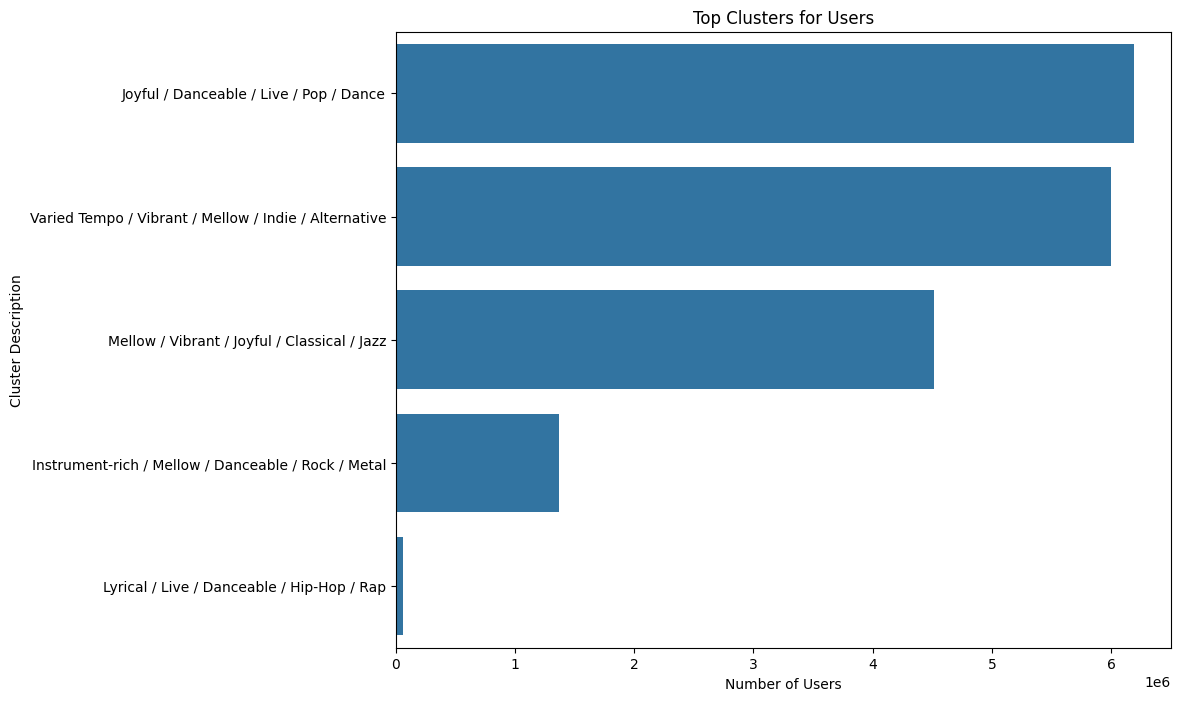

In [26]:
cluster_counts = agg_data['Cluster_Description'].value_counts().head(20)  # Show top 20 for brevity

plt.figure(figsize=(10, 8))
sns.barplot(x=cluster_counts.values, y=cluster_counts.index)
plt.title('Top Clusters for Users')
plt.xlabel('Number of Users')
plt.ylabel('Cluster Description')
plt.show()

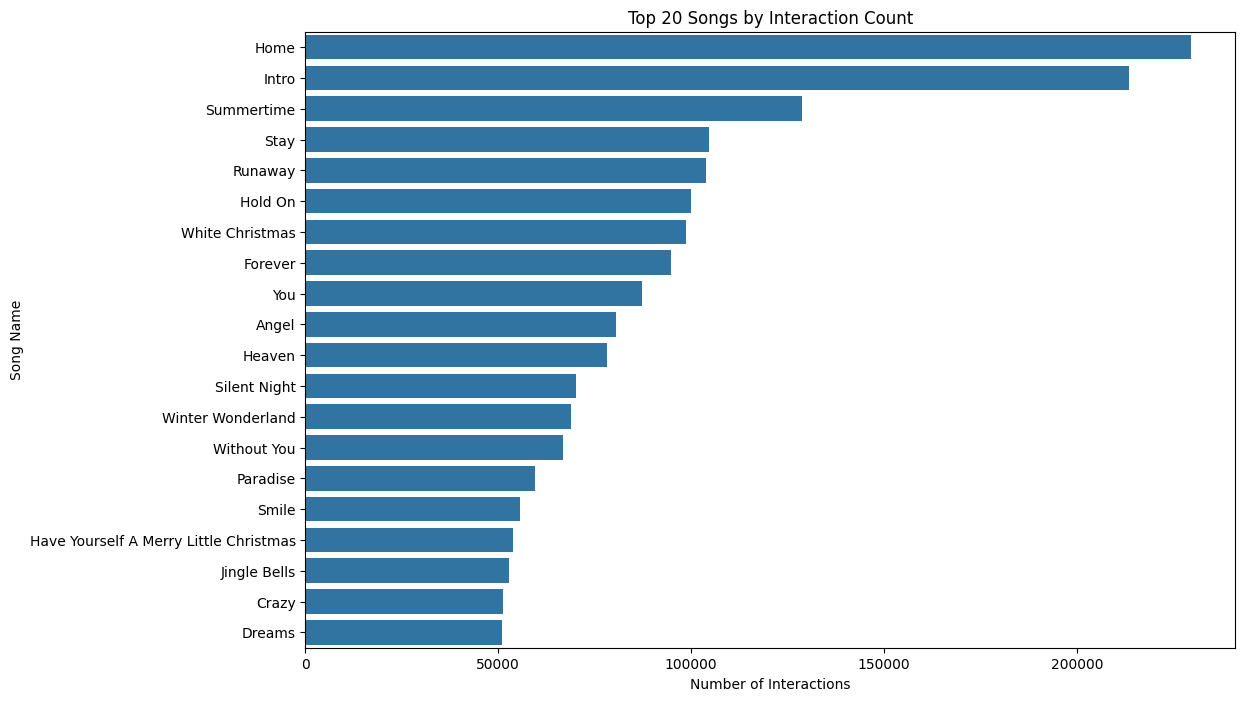

In [19]:
song_counts = agg_data.groupby('trackname')['play_count'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=song_counts.values, y=song_counts.index)
plt.title('Top 20 Songs by Interaction Count')
plt.xlabel('Number of Interactions')
plt.ylabel('Song Name')
plt.show()

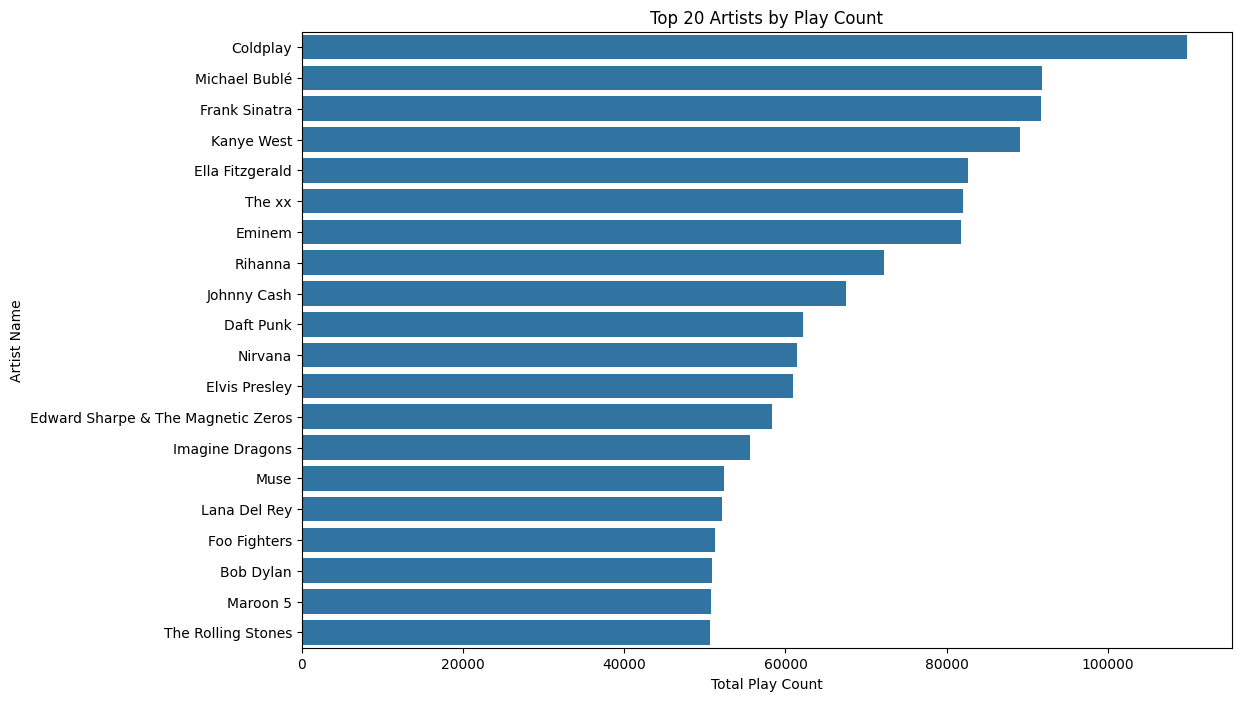

In [20]:
top_artists = agg_data.groupby('artistname')['play_count'].sum().nlargest(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 20 Artists by Play Count')
plt.xlabel('Total Play Count')
plt.ylabel('Artist Name')
plt.show()
